#Loading the dataset

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load JSON file
with open('Sarcasm_Headlines_Dataset_v2_EDA.json', 'r') as file:
    data = json.load(file)

# Create lists to store headline and label data
headlines = []
labels = []

# Extract headline and label data from JSON
for entry in data:
    headlines.append(entry['headline'])
    labels.append(entry['is_sarcastic'])

# Create a DataFrame from the extracted data
df = pd.DataFrame({'headline': headlines, 'is_sarcastic': labels})

# Function to remove stop words from a headline
def remove_stopwords(headline):
    stopwords = set(ENGLISH_STOP_WORDS)
    words = headline.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

# Create a new column for headlines without stop words
df['headline_without_stopwords'] = df['headline'].apply(lambda x: remove_stopwords(x))

# Print the first few rows of the DataFrame
print("Sample headlines and labels:")
print(df)

Sample headlines and labels:
                                                headline  is_sarcastic  \
0      thirtysomething scientists unveil doomsday clo...             1   
1      dem rep. totally nails why congress is falling...             0   
2      eat your veggies: 9 deliciously different recipes             0   
3      inclement weather prevents liar from getting t...             1   
4      mother comes pretty close to using word 'strea...             1   
...                                                  ...           ...   
28614       jews to celebrate rosh hashasha or something             1   
28615  internal affairs investigator disappointed con...             1   
28616  the most beautiful acceptance speech this week...             0   
28617  mars probe destroyed by orbiting spielberg-gat...             1   
28618                 dad clarifies this not a food stop             1   

                              headline_without_stopwords  
0      thirtysomething 

# Exploratory Data Analysis (EDA)


EDA Results:
Total headlines: 28619
Sarcastic headlines: 13634
Non-sarcastic headlines: 14985
Percentage of sarcastic headlines: 47.64%


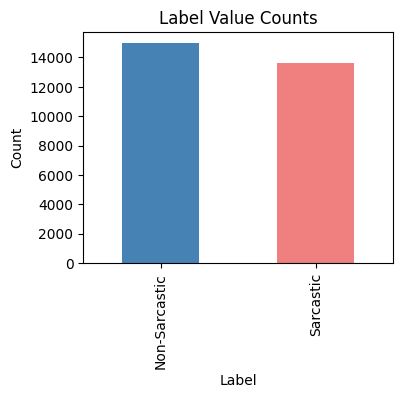

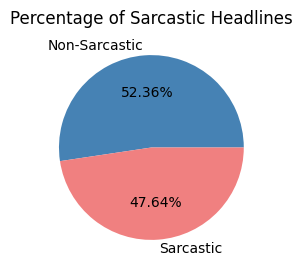

In [7]:
print("\nEDA Results:")
print("Total headlines:", len(df))
print("Sarcastic headlines:", df['is_sarcastic'].sum())
print("Non-sarcastic headlines:", len(df) - df['is_sarcastic'].sum())

# Calculate the percentage of sarcastic headlines
sarcastic_percentage = (df['is_sarcastic'].sum() / len(df)) * 100
print("Percentage of sarcastic headlines: {:.2f}%".format(sarcastic_percentage))

# Plotting value counts of labels
plt.figure(figsize=(4, 3))
df['is_sarcastic'].value_counts().plot(kind='bar', color=['steelblue', 'lightcoral'])
plt.title('Label Value Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Sarcastic', 'Sarcastic'])
plt.show()

# Plotting percentage of sarcastic headlines
plt.figure(figsize=(3, 3))
plt.pie([len(df) - df['is_sarcastic'].sum(), df['is_sarcastic'].sum()],
        labels=['Non-Sarcastic', 'Sarcastic'],
        colors=['steelblue', 'lightcoral'],
        autopct='%.2f%%')
plt.title('Percentage of Sarcastic Headlines')
plt.show()


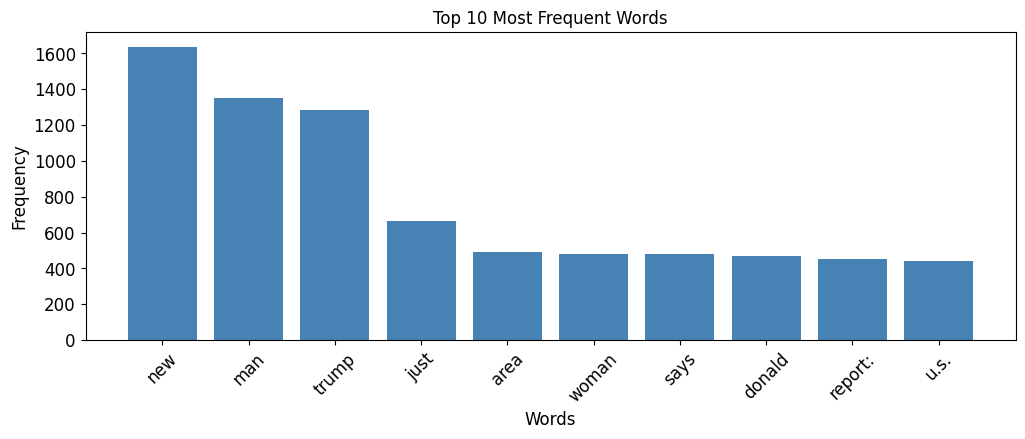

In [6]:
# Create a list to store headline data
headline_data = []

for entry in df['headline_without_stopwords']:
    headline_data.append(entry)

# Concatenate all headlines into a single string
all_headlines = ' '.join(headline_data)

# Split the text into individual words
words = all_headlines.lower().split()

# Count word frequencies
word_freq = Counter(words)

# Select top N words for plotting
top_words = word_freq.most_common(10)
words, counts = zip(*top_words)

# Plot word frequency bar plot
plt.figure(figsize=(12, 4))
plt.bar(words, counts, color='steelblue')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Get sarcastic and non-sarcastic headlines
sarcastic_headlines = df[df['is_sarcastic'] == 1]['headline_without_stopwords']
non_sarcastic_headlines = df[df['is_sarcastic'] == 0]['headline_without_stopwords']

# Count word frequencies in sarcastic headlines
sarcastic_word_counts = Counter(' '.join(sarcastic_headlines).split())
sarcastic_top_words = sarcastic_word_counts.most_common(10)

# Count word frequencies in non-sarcastic headlines
non_sarcastic_word_counts = Counter(' '.join(non_sarcastic_headlines).split())
non_sarcastic_top_words = non_sarcastic_word_counts.most_common(10)

# Print the top words in sarcastic headlines
print("Top words in sarcastic headlines:")
for word, count in sarcastic_top_words:
    print(word, count)

# Print the top words in non-sarcastic headlines
print("\nTop words in non-sarcastic headlines:")
for word, count in non_sarcastic_top_words:
    print(word, count)

Top words in sarcastic headlines:
man 1143
new 973
area 487
just 434
report: 428
woman 353
trump 327
time 261
day 251
like 233

Top words in non-sarcastic headlines:
trump 957
new 664
donald 453
trump's 364
says 346
women 240
just 232
u.s. 223
make 209
people 208


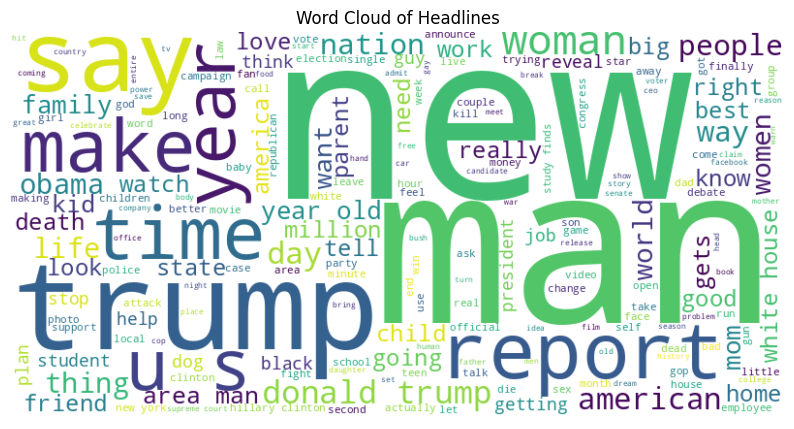

In [8]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['headline_without_stopwords']))

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()


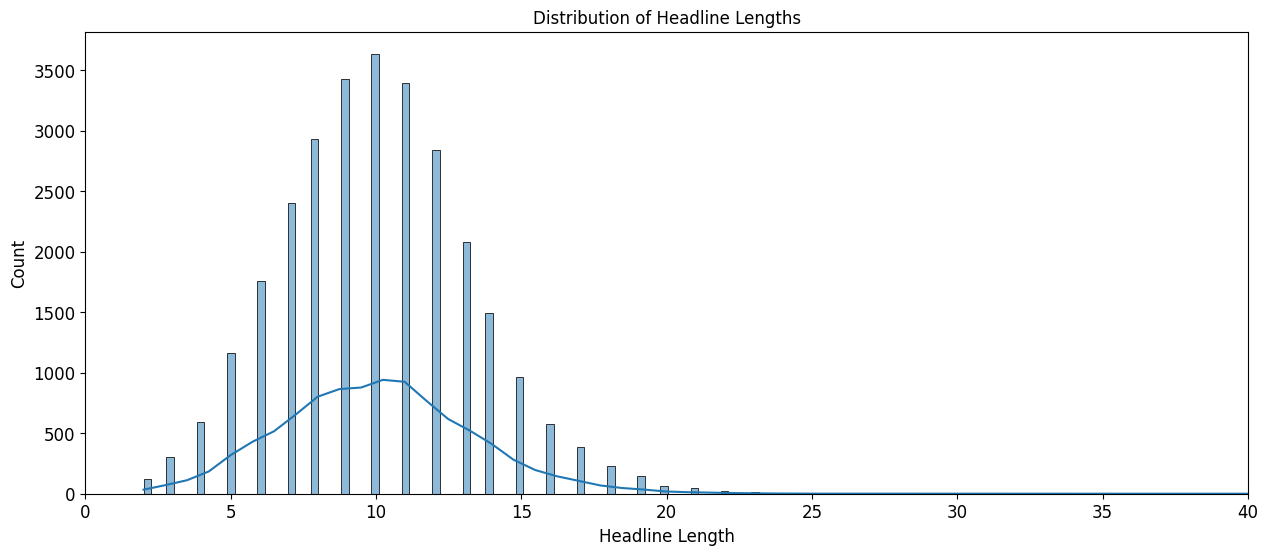

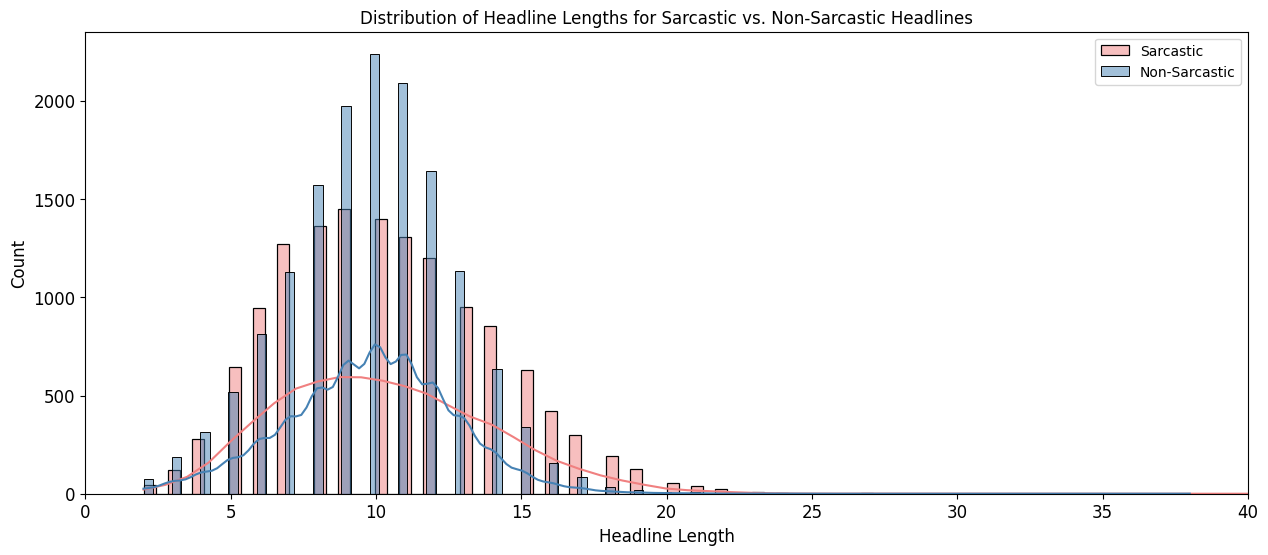

In [10]:
df['headline_length'] = df['headline'].apply(lambda x: len(x.split()))

# Plot distribution of headline lengths
plt.figure(figsize=(15, 6))
plt.xlim(xmin=0, xmax=40)
sns.histplot(data=df, x='headline_length', kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length',fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Separate sarcasm and non-sarcasm headlines
sarcasm_headlines = df[df['is_sarcastic'] == 1]['headline_length']
non_sarcasm_headlines = df[df['is_sarcastic'] == 0]['headline_length']

# Plot distribution of headline lengths
plt.figure(figsize=(15, 6))
plt.xlim(xmin=0, xmax=40)
sns.histplot(data=sarcasm_headlines, kde=True, color='lightcoral', label='Sarcastic')
sns.histplot(data=non_sarcasm_headlines, kde=True, color='steelblue', label='Non-Sarcastic')
plt.title('Distribution of Headline Lengths for Sarcastic vs. Non-Sarcastic Headlines')
plt.xlabel('Headline Length', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend()
plt.show()